In [48]:
%load_ext autoreload
%autoreload 2

from run import set_lambda, DATA_TRAIN_PATH, ret_classif_percentage, get_normalization_methods, \
    normalize_data, train
from proj1_helpers import load_csv_data
import numpy as np
PLOT_PATH = '../plots/'

# Do not waste time to save the result
lambdas = (1e-22, 1e-21, 5e-21, 1e-20, 5e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15,
           1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-2, 1)

trs = []
tes= []

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
norm_method = get_normalization_methods(tX)
tX = normalize_data(tX, norm_method)

for lmbd in lambdas:
    set_lambda(lmbd)
    w = train(tX, y)
    tr, te = ret_classif_percentage()
    print(tr)
    trs.append(tr)
    tes.append(te)

trs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training set loss 0.3784656751992972; test set loss 10.48733425806746
Training set good classification 0.7771733333333334; test good classification 0.78048
0.7771733333333334
Training set loss 0.32103230949045924; test set loss 2.5180896813654123
Training set good classification 0.8012622222222222; test good classification 0.80424
0.8012622222222222
Training set loss 0.28001229746175244; test set loss 0.37634807163810496
Training set good classification 0.81268; test good classification 0.81452
0.81268
Training set loss 0.2774601381009105; test set loss 0.7144680410134334
Training set good classification 0.8141911111111111; test good classification 0.81636
0.8141911111111111
Training set loss 0.27832136052323575; test set loss 0.27941453623865287
Training set good classification 0.8132533333333334; test good classification 0.81608
0.8132533333333334
Training set loss 0.2806975987903992; test set los

[0.7771733333333334,
 0.8012622222222222,
 0.81268,
 0.8141911111111111,
 0.8132533333333334,
 0.8118533333333333,
 0.8118133333333334,
 0.8047066666666667,
 0.8078355555555555,
 0.8048,
 0.8013066666666666,
 0.7998666666666666,
 0.7985022222222222,
 0.7975244444444445,
 0.7963777777777777,
 0.7924977777777777,
 0.7848933333333333,
 0.7783511111111111,
 0.7716577777777778,
 0.7641733333333334,
 0.7488977777777778,
 0.7263511111111111,
 0.7037155555555555,
 0.7037155555555555,
 0.66844]

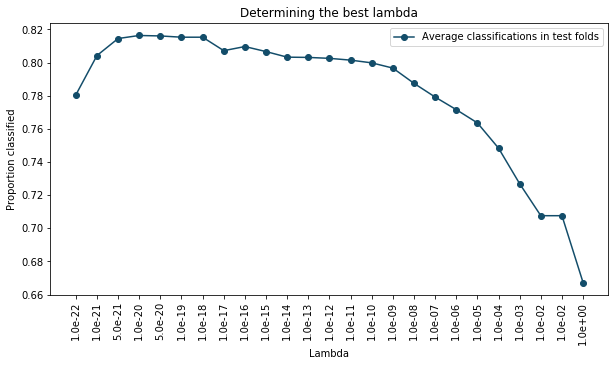

In [25]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))

lns1 = ax.plot(np.arange(1,len(lambdas)+1), tes, color='#134d6a', label='Average classifications in test folds', marker='o')

ax.set_xlabel('Lambda')
ax.set_ylabel('Proportion classified')
ax.set_xticks(np.arange(1,len(lambdas)+1))
ax.set_xticklabels(labels=['%.1e' % x for x in lambdas], rotation=90)
ax.legend(loc='upper right')

fig.savefig(PLOT_PATH+"Determining the best lambda.pdf", bbox_inches='tight')

plt.title('Determining the best lambda')
plt.show()